# Train MNIST Predictor

This notebook aims to create a basic MLP to predict the MNIST digits

## Predict digits 

Train a MLP on the MNIST dataset to predict 0-9 digits

In [1]:
# Change the reference dir to the root folder
import os
os.chdir('../')

In [ ]:
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from utils import plot_numbers, get_accuracy_by_digit

In [3]:
(X_train_full, y_train_full), (X_test_full, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.min(), X_train_full.max()

(0, 255)

The train set contains 60,000 images in 28x28 array. Each element of the array represents the pixel intensity of the image, ranging from 1 to 255

Let's see some of the pictures of the dataset

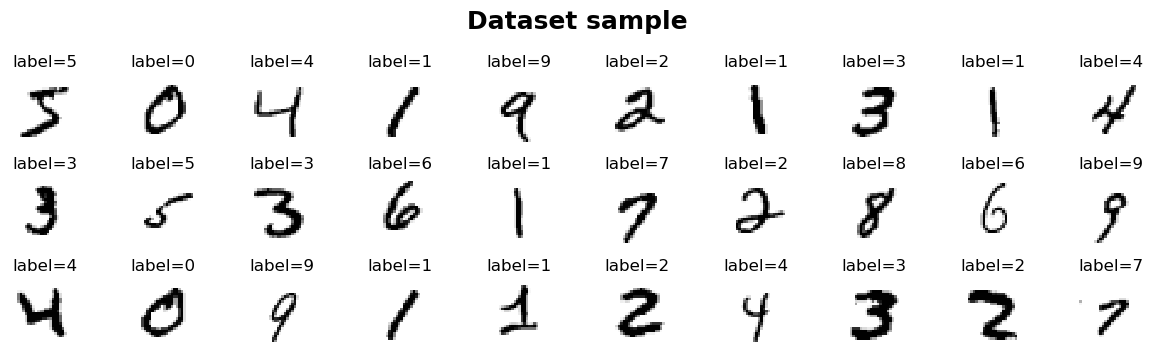

In [6]:
plot_numbers(X_train_full, true_label=y_train_full, title='Dataset sample');

Normalizing array and creating validation set (the data is already shuffled)

In [7]:
# Creating validation set
X_train, X_valid = X_train_full[5000:], X_train_full[:5000]
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

## Building a model to predict the digits

In [8]:
retrain = True

In [9]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=200, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
]
)

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [14]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./models/default_mnist.h5", save_best_only=True)

In [15]:
if retrain:
    history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stopping_cb, checkpoint_cb])
else:
    model = tf.keras.models.load_model('./models/default_mnist.h5')

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0637 - accuracy: 0.8559 - val_loss: 0.2963 - val_accuracy: 0.9176
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2458 - accuracy: 0.9323 - val_loss: 0.2783 - val_accuracy: 0.9302
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1811 - accuracy: 0.9493 - val_loss: 0.2198 - val_accuracy: 0.9412
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1559 - accuracy: 0.9555 - val_loss: 0.1467 - val_accuracy: 0.9616
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1231 - accuracy: 0.9652 - val_loss: 0.1241 - val_accuracy: 0.9678
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1054 - accuracy: 0.9696 - val_loss: 0.1237 - val_accuracy: 0.9684
Epoch 7/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0938 - accuracy: 0.9739 - val_loss: 0.1309 - val_ac

In [17]:
y_pred = np.argmax(model.predict(X_test_full), axis=1)

313/313 [==============================] - 1s 2ms/step


In [20]:
get_accuracy_by_digit(y_test, y_pred)

y_true
0    0.992857
1    0.995595
2    0.977713
3    0.977228
4    0.965377
5    0.969731
6    0.972860
7    0.984436
8    0.974333
9    0.938553
Name: right, dtype: float64

In [21]:
print('Metrics:')
print(classification_report(y_test, y_pred))

Metrics:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.98      0.98     10000



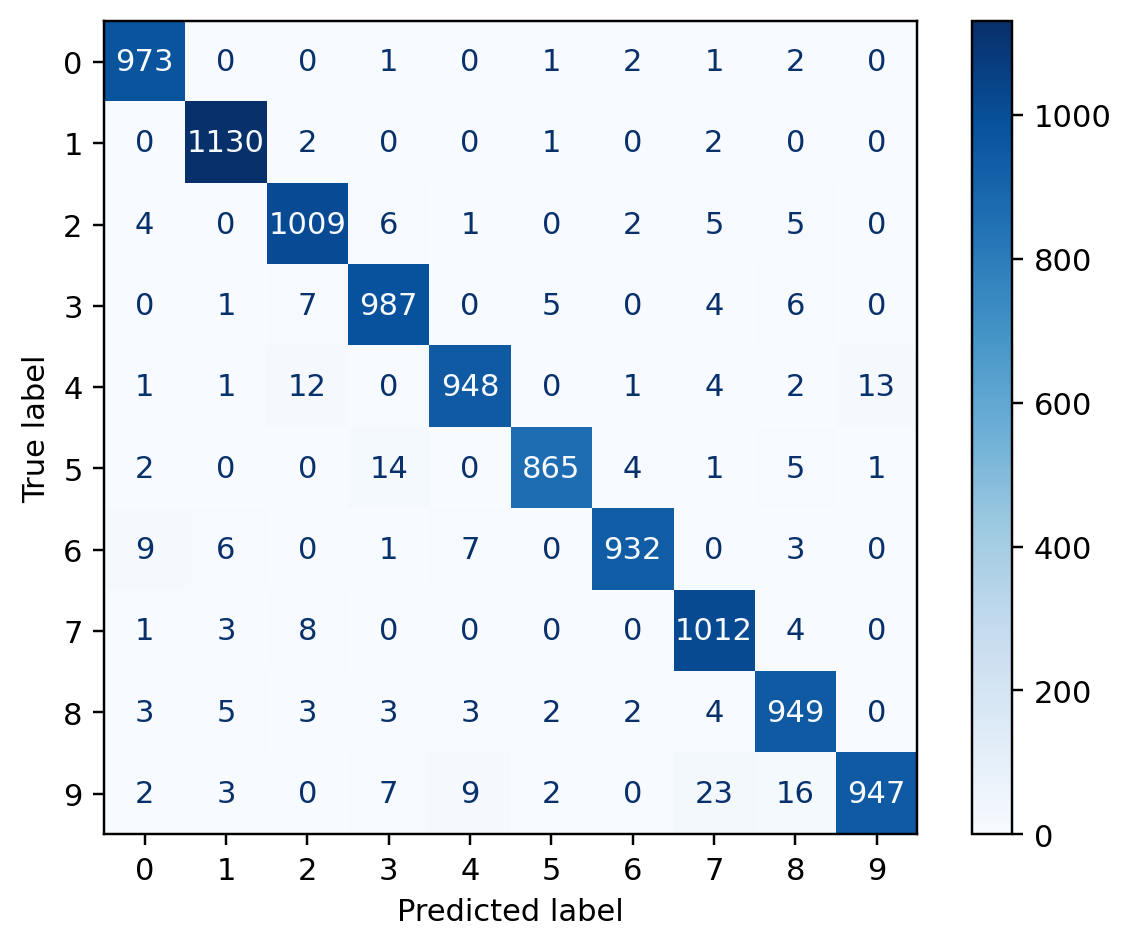

In [22]:
fig, ax = plt.subplots(dpi=220)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax)
plt.show()

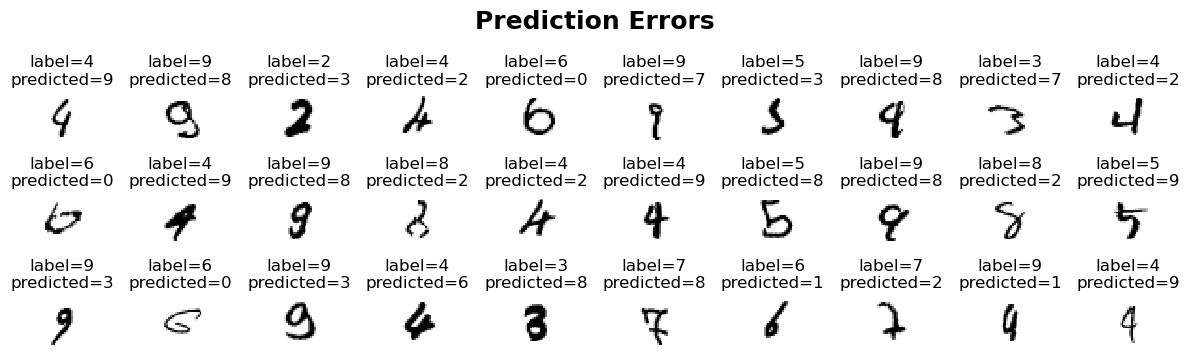

In [25]:
plot_numbers(
    img_array=X_test_full[y_pred != y_test],
    true_label=y_test[y_pred != y_test],
    predicted_label=y_pred[y_pred != y_test],
    title='Prediction Errors'
);